In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [30]:
home_data = pd.read_csv("C:\\Users\\anthony\\Downloads\\california_housing.csv")

In [31]:
home_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,206855.816909
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,115395.615874
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,14999.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,119600.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,179700.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,264725.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,500001.000000


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

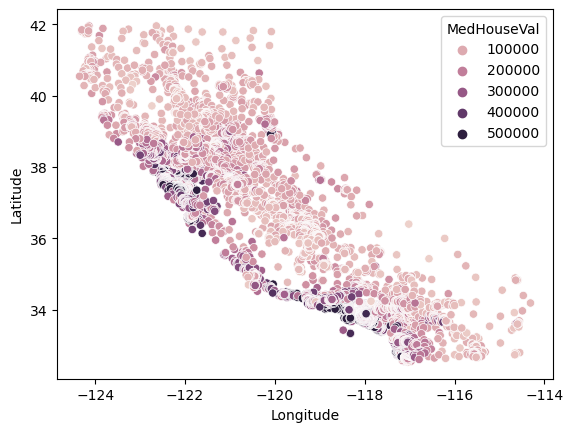

In [32]:
sns.scatterplot(data = home_data, x = 'Longitude', y = 'Latitude', hue = 'MedHouseVal')

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['Latitude', 'Longitude']], home_data[['MedHouseVal']], test_size=0.33, random_state=0)

In [41]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init=10)
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

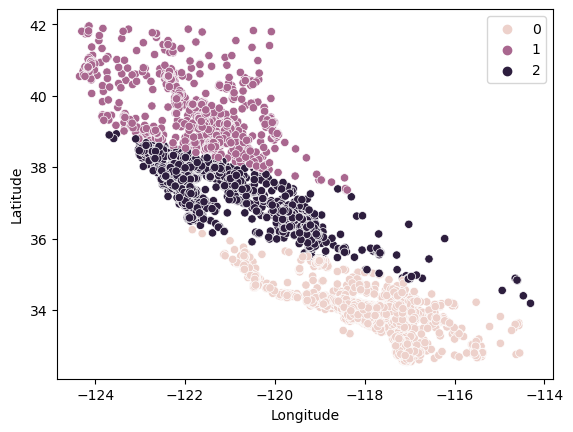

In [58]:
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)

<AxesSubplot:ylabel='MedHouseVal'>

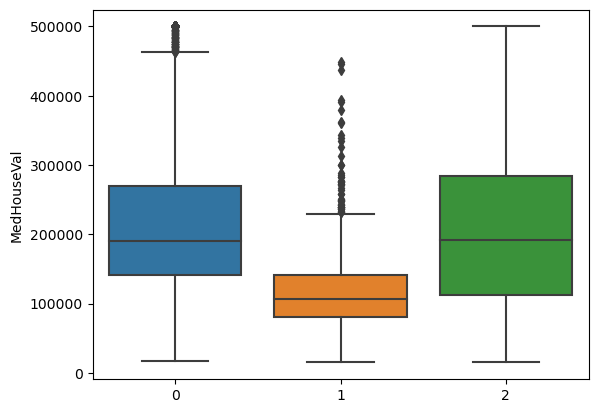

In [59]:
sns.boxplot(x = kmeans.labels_, y = y_train['MedHouseVal'])

In [47]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7499371920703547

In [49]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init=10).fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

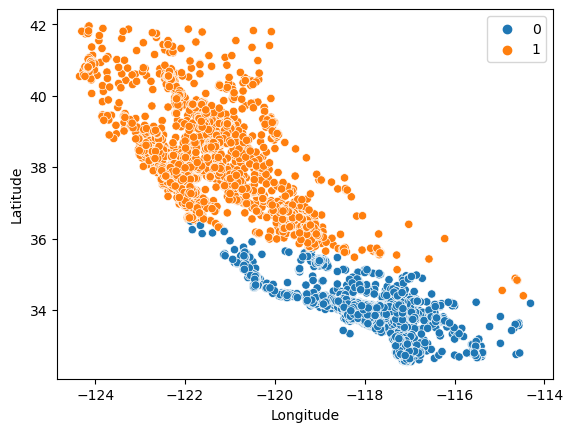

In [51]:
# at k = 2.

sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = fits[0].labels_)

# The model does an ok job of splitting the state into two halves, but probably doesn’t capture enough nuance in the California housing market.

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

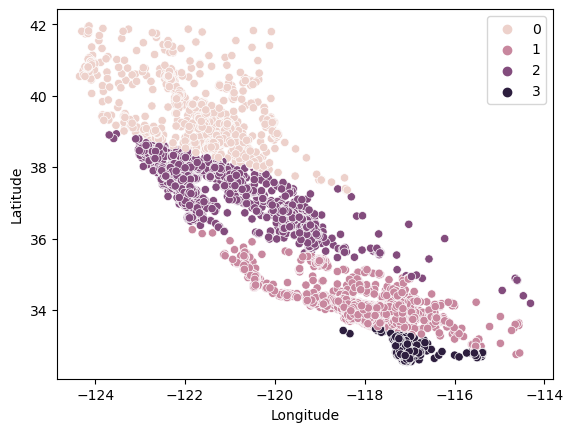

In [52]:
# at k = 4.
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = fits[2].labels_)


# The above plot groups California into more logical clusters across the state based on how far North or South the houses are in the state. This model most likely captures more nuance in the housing market as we move across the state. 

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

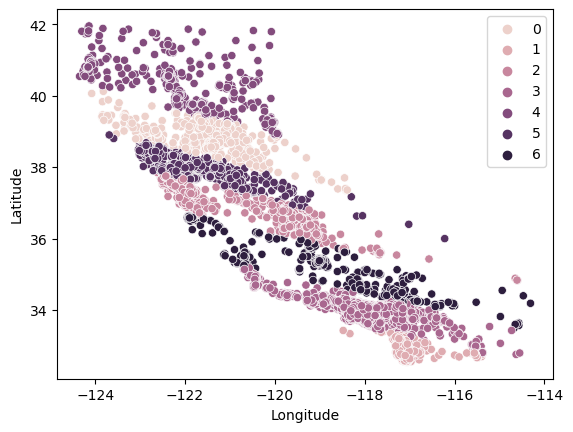

In [53]:
# at k = 7.
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = fits[5].labels_)


# The above graph appears to have too many clusters. We have sacrifice easy interpretation of the clusters for a “more accurate” geo-clustering result

<AxesSubplot:>

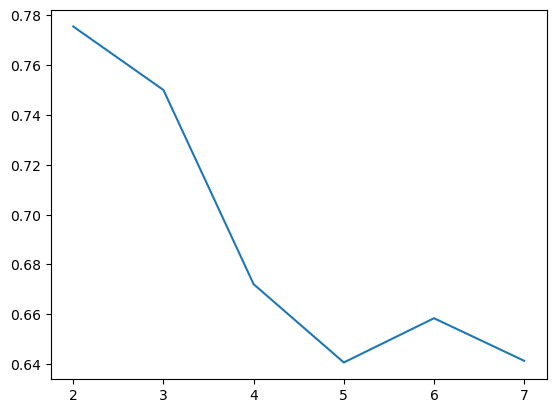

In [54]:
sns.lineplot(x = K, y = score)

# It appears k = 5 is probably the best we can do without overfitting

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

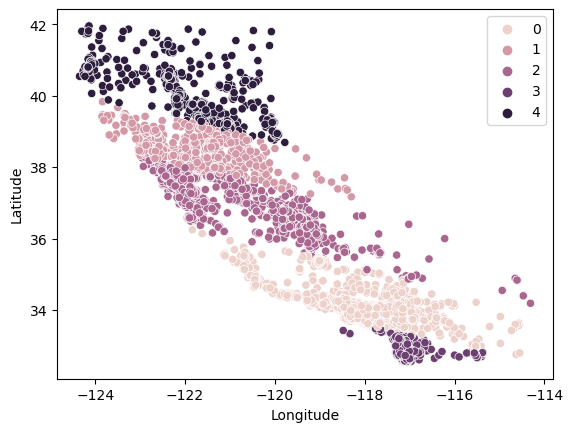

In [55]:
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = fits[3].labels_)

<AxesSubplot:ylabel='MedHouseVal'>

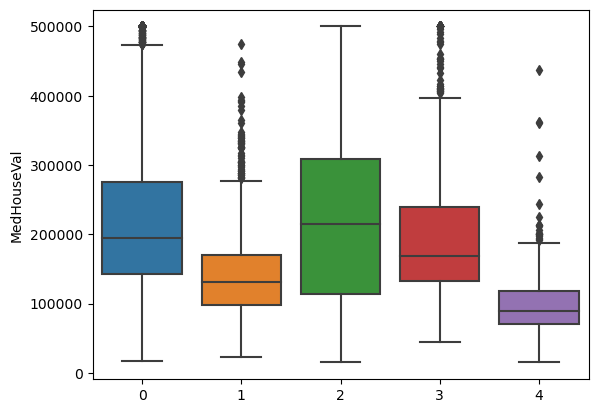

In [57]:
sns.boxplot(x = fits[3].labels_, y = y_train['MedHouseVal'])

In [60]:
#Performing agglomerative clustering. Note, could take long.
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(data, method="complete", metric="euclidean")
average_clustering = linkage(data, method="average", metric="euclidean")
single_clustering = linkage(data, method="single", metric="euclidean")

In [ ]:
dendrogram(complete_clustering)
plt.show()